# Linear filtering : modify pixels based on some fxn of local neighborhood , when this fxn is lin.combn. of neighbors is linear filer

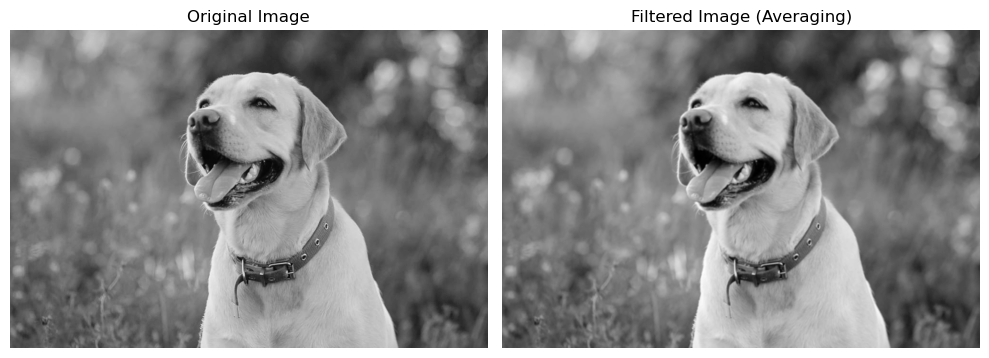

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread('dog.jpeg', cv2.IMREAD_GRAYSCALE)

# Define a linear filter (e.g., 3x3 averaging kernel)
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]], dtype=np.float32) / 9

# Apply filter using cv2.filter2D
filtered_img = cv2.filter2D(img, -1, kernel)

# Plot original and filtered images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Filtered Image (Averaging)')
plt.imshow(filtered_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


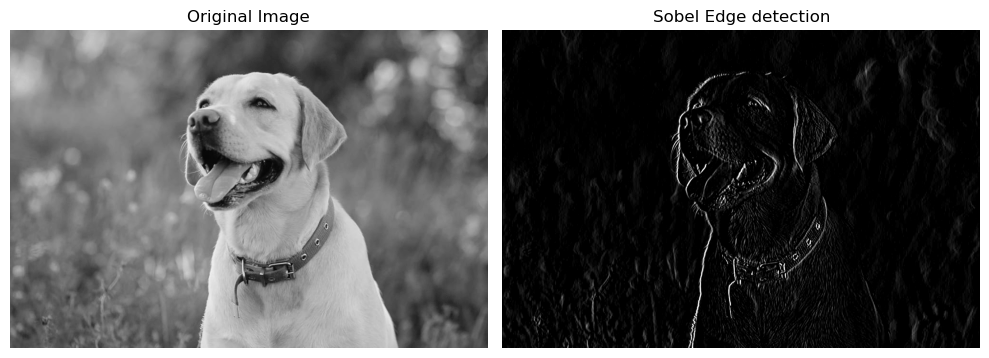

In [3]:

# Define a linear filter (e.g., 3x3 averaging kernel)
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]], dtype=np.float32)  # Sobel X


# Apply filter using cv2.filter2D
filtered_img = cv2.filter2D(img, -1, kernel)

# Plot original and filtered images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sobel Edge detection')
plt.imshow(filtered_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


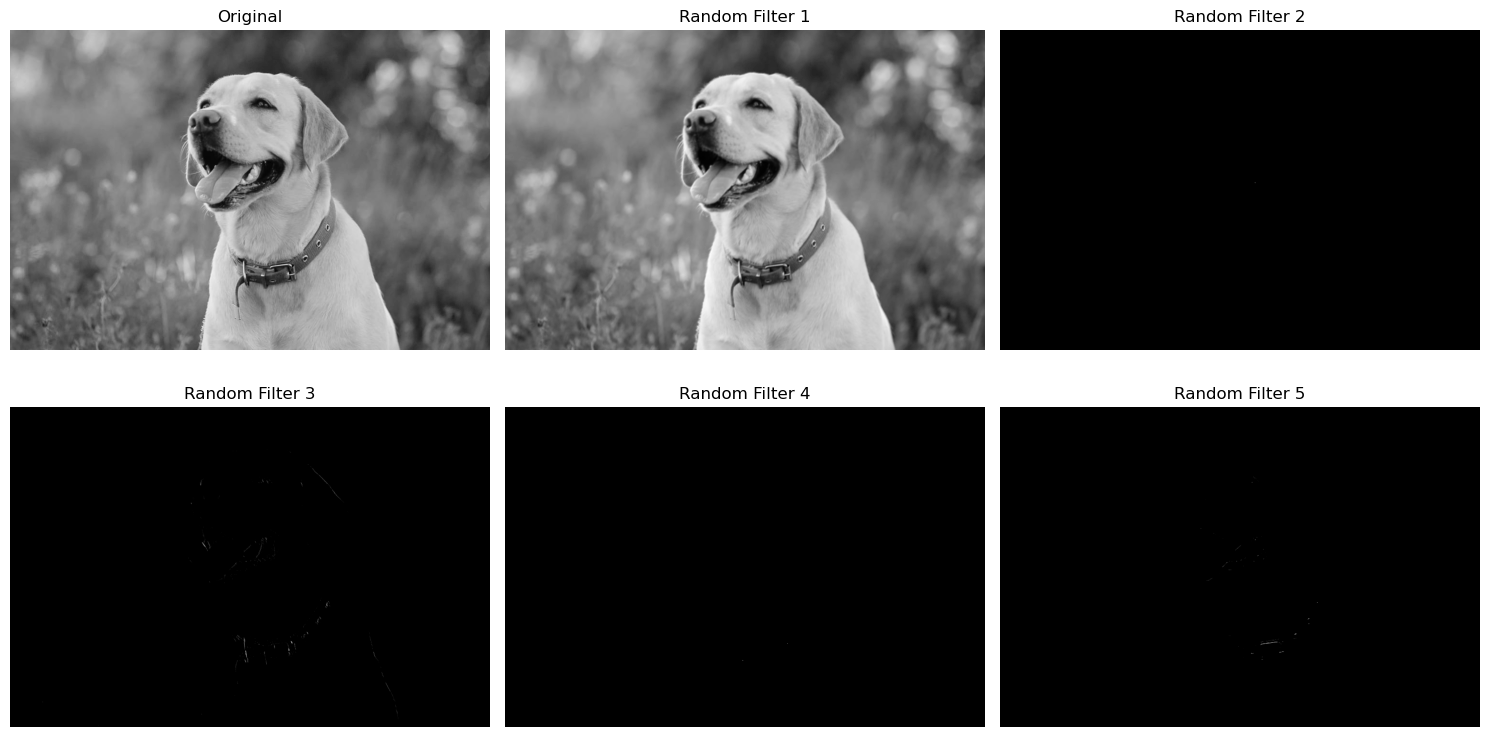


Kernel 1:
[[ 0.2113377   0.03816107  0.18582071]
 [ 0.20571172 -0.05506214  0.02061602]
 [ 0.1699136   0.0960435   0.01733329]]

Kernel 2:
[[-0.06920417 -0.13987677 -0.08842017]
 [-0.13950884 -0.14070792  0.14255889]
 [ 0.1418153  -0.02351874 -0.1143891 ]]

Kernel 3:
[[ 0.09002994 -0.17764497  0.13262367]
 [ 0.07056544 -0.03994985 -0.1771949 ]
 [-0.00825482  0.15636247 -0.14737374]]

Kernel 4:
[[ 0.15120712 -0.18874699 -0.19485998]
 [-0.1265758  -0.12996282 -0.10621391]
 [ 0.04294585 -0.04916767  0.01031962]]

Kernel 5:
[[-0.10715088  0.17209996  0.07187307]
 [ 0.12195296 -0.07527211 -0.10087349]
 [-0.0767182  -0.15937306 -0.11468613]]


In [4]:
def apply_random_filters(img, num_filters=5):
    filtered_imgs = []
    kernels = []
    for _ in range(num_filters):
        # Random 3x3 kernel with values between -1 and 1
        kernel = np.random.uniform(-1, 1, (3, 3)).astype(np.float32)
        
        # Optional: Normalize the kernel
        kernel /= np.sum(np.abs(kernel)) + 1e-6
        
        # Apply filter
        filtered = cv2.filter2D(img, -1, kernel)
        filtered_imgs.append(filtered)
        kernels.append(kernel)
    return filtered_imgs, kernels

# Apply 5 random filters
filtered_imgs, kernels = apply_random_filters(img, num_filters=5)

# Plot
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

for i in range(5):
    plt.subplot(2, 3, i+2)
    plt.imshow(filtered_imgs[i], cmap='gray')
    plt.title(f'Random Filter {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Optionally print the kernels
for i, k in enumerate(kernels):
    print(f"\nKernel {i+1}:\n{k}")

To be fair , most of them dont make sense 

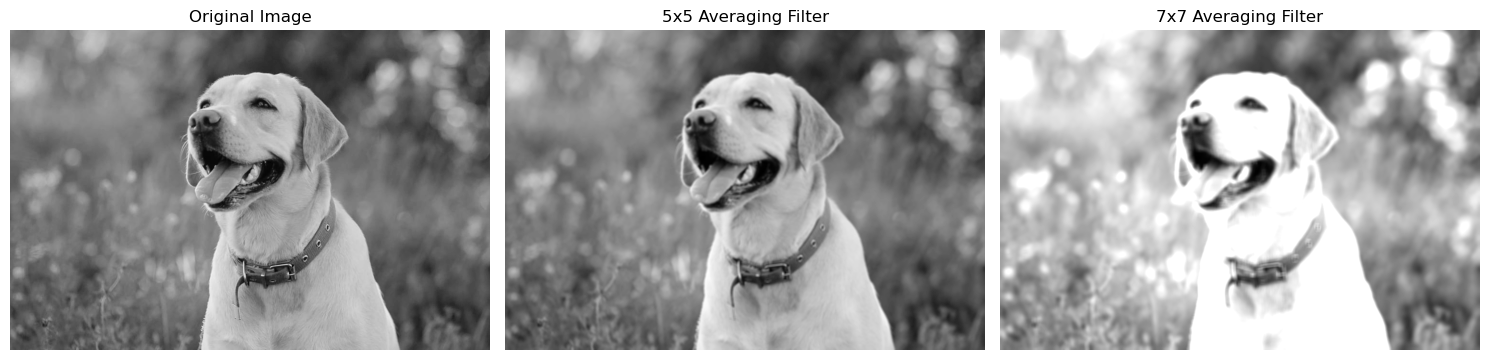

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define averaging kernels
kernel_5x5 = np.ones((5, 5), np.float32) / 25
kernel_7x7 = np.ones((9, 9), np.float32) / 49

# Apply filters
avg_5x5 = cv2.filter2D(img, -1, kernel_5x5)
avg_7x7 = cv2.filter2D(img, -1, kernel_7x7)

# Plotting results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(avg_5x5, cmap='gray')
plt.title('5x5 Averaging Filter')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(avg_7x7, cmap='gray')
plt.title('7x7 Averaging Filter')
plt.axis('off')

plt.tight_layout()
plt.show()


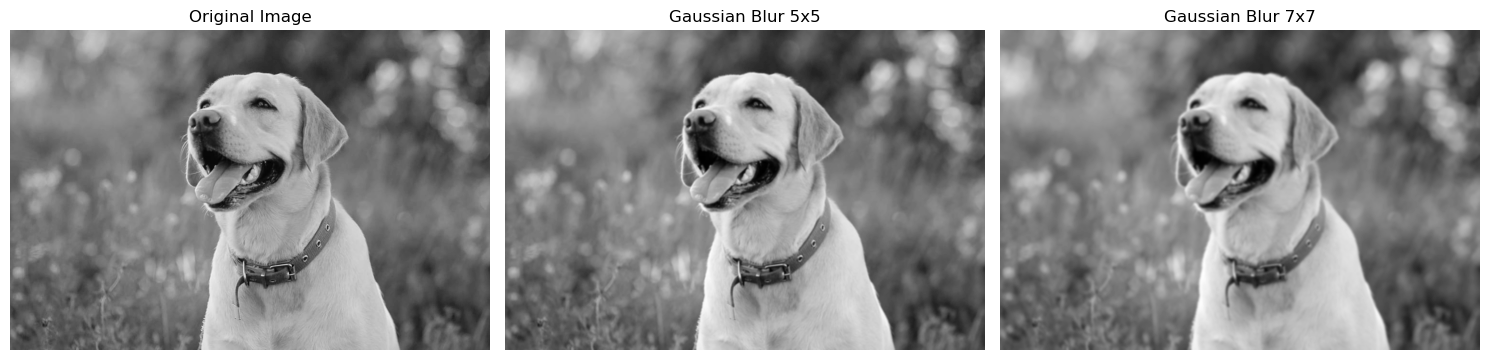

In [10]:
import cv2
import matplotlib.pyplot as plt

# Apply Gaussian filters (ksize must be odd and >1)
gauss_5x5 = cv2.GaussianBlur(img, ksize=(5, 5), sigmaX=0)
gauss_7x7 = cv2.GaussianBlur(img, ksize=(11, 11), sigmaX=0)

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gauss_5x5, cmap='gray')
plt.title('Gaussian Blur 5x5')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gauss_7x7, cmap='gray')
plt.title('Gaussian Blur 7x7')
plt.axis('off')

plt.tight_layout()
plt.show()


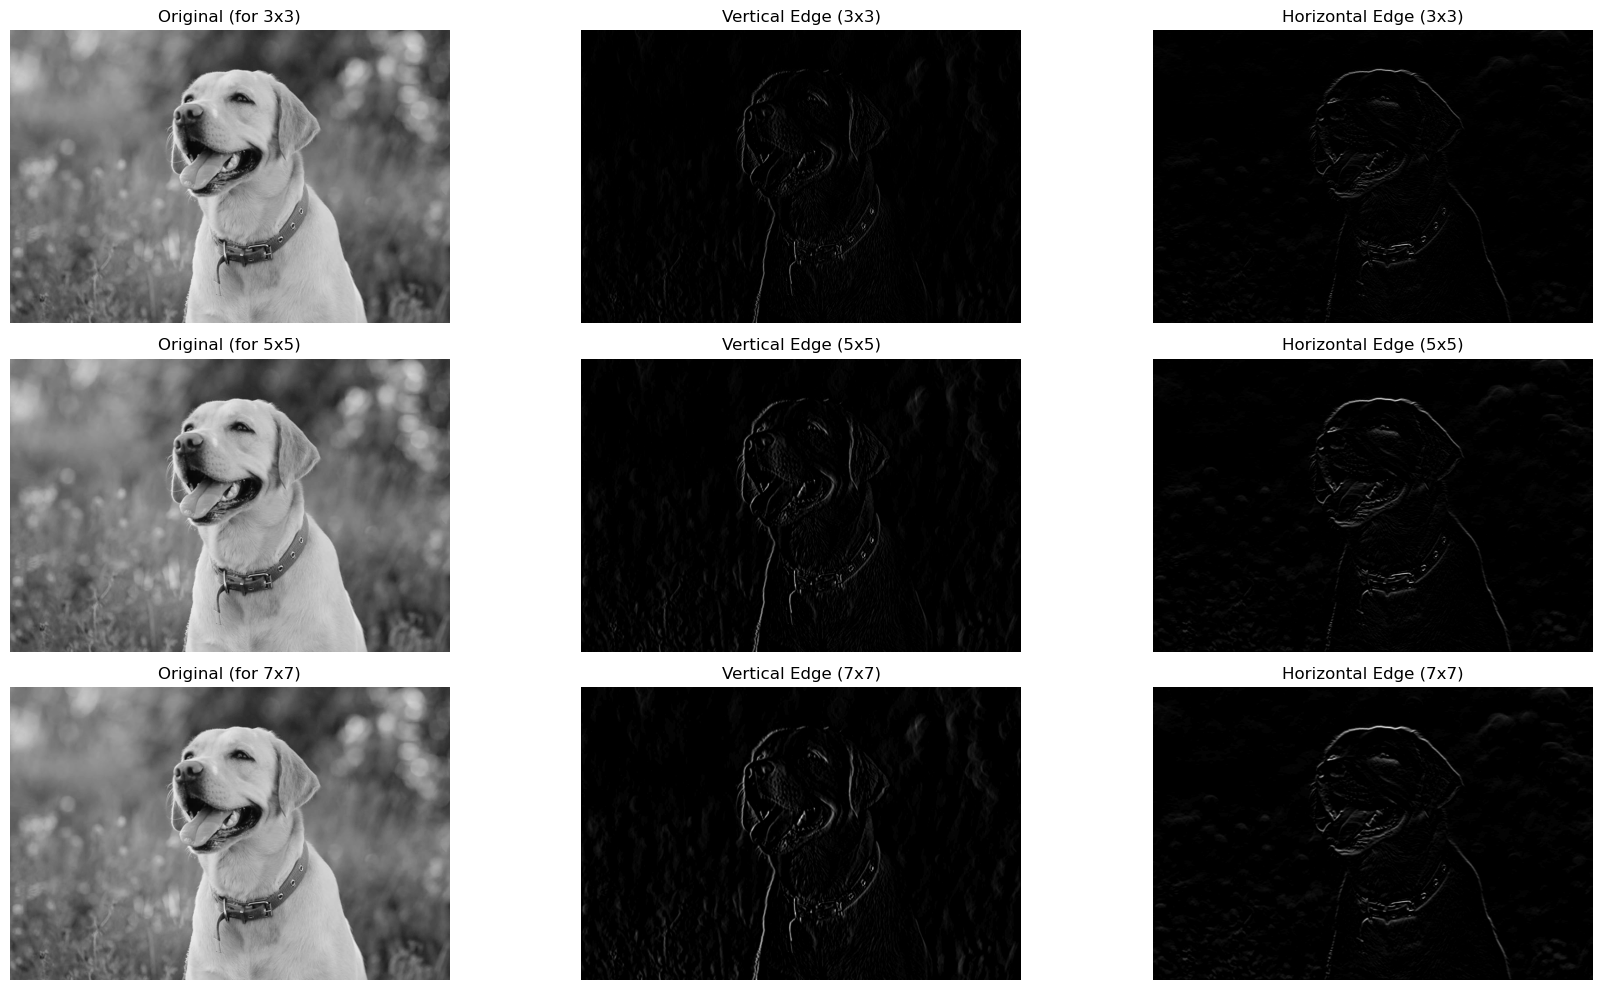


--- 3x3 Kernels ---
Vertical (X-dir):
[[-0.125  0.     0.125]
 [-0.25   0.     0.25 ]
 [-0.125  0.     0.125]]
Horizontal (Y-dir):
[[-0.125 -0.25  -0.125]
 [ 0.     0.     0.   ]
 [ 0.125  0.25   0.125]]

--- 5x5 Kernels ---
Vertical (X-dir):
[[-0.008 -0.016  0.     0.016  0.008]
 [-0.031 -0.062  0.     0.062  0.031]
 [-0.047 -0.094  0.     0.094  0.047]
 [-0.031 -0.062  0.     0.062  0.031]
 [-0.008 -0.016  0.     0.016  0.008]]
Horizontal (Y-dir):
[[-0.008 -0.031 -0.047 -0.031 -0.008]
 [-0.016 -0.062 -0.094 -0.062 -0.016]
 [ 0.     0.     0.     0.     0.   ]
 [ 0.016  0.062  0.094  0.062  0.016]
 [ 0.008  0.031  0.047  0.031  0.008]]

--- 7x7 Kernels ---
Vertical (X-dir):
[[-0.    -0.002 -0.002  0.     0.002  0.002  0.   ]
 [-0.003 -0.012 -0.015  0.     0.015  0.012  0.003]
 [-0.007 -0.029 -0.037  0.     0.037  0.029  0.007]
 [-0.01  -0.039 -0.049  0.     0.049  0.039  0.01 ]
 [-0.007 -0.029 -0.037  0.     0.037  0.029  0.007]
 [-0.003 -0.012 -0.015  0.     0.015  0.012  0.003]
 [-

In [12]:
kernel_v_3x3 = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]], dtype=np.float32)
kernel_h_3x3 = np.array([[-1, -2, -1],
                         [ 0,  0,  0],
                         [ 1,  2,  1]], dtype=np.float32)
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_sobel_kernel(size, axis='x'):
    kx, ky = cv2.getDerivKernels(dx=1 if axis == 'x' else 0,
                                  dy=1 if axis == 'y' else 0,
                                  ksize=size, normalize=True)
    return ky @ kx.T  # Outer product

sizes = [3, 5, 7]
results = []

for size in sizes:
    kernel_x = get_sobel_kernel(size, 'x')
    kernel_y = get_sobel_kernel(size, 'y')

    filtered_x = cv2.filter2D(img, -1, kernel_x)
    filtered_y = cv2.filter2D(img, -1, kernel_y)

    results.append((size, filtered_x, filtered_y, kernel_x, kernel_y))

# Plotting results
plt.figure(figsize=(18, 10))
for i, (size, fx, fy, _, _) in enumerate(results):
    plt.subplot(3, 3, i * 3 + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Original (for {size}x{size})')
    plt.axis('off')

    plt.subplot(3, 3, i * 3 + 2)
    plt.imshow(fx, cmap='gray')
    plt.title(f'Vertical Edge ({size}x{size})')
    plt.axis('off')

    plt.subplot(3, 3, i * 3 + 3)
    plt.imshow(fy, cmap='gray')
    plt.title(f'Horizontal Edge ({size}x{size})')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Optional: print kernels
for size, _, _, kx, ky in results:
    print(f"\n--- {size}x{size} Kernels ---")
    print(f"Vertical (X-dir):\n{np.round(kx, 3)}")
    print(f"Horizontal (Y-dir):\n{np.round(ky, 3)}")


/home/gagan/anaconda3/lib/python3.12/site-packages/matplotlib/animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


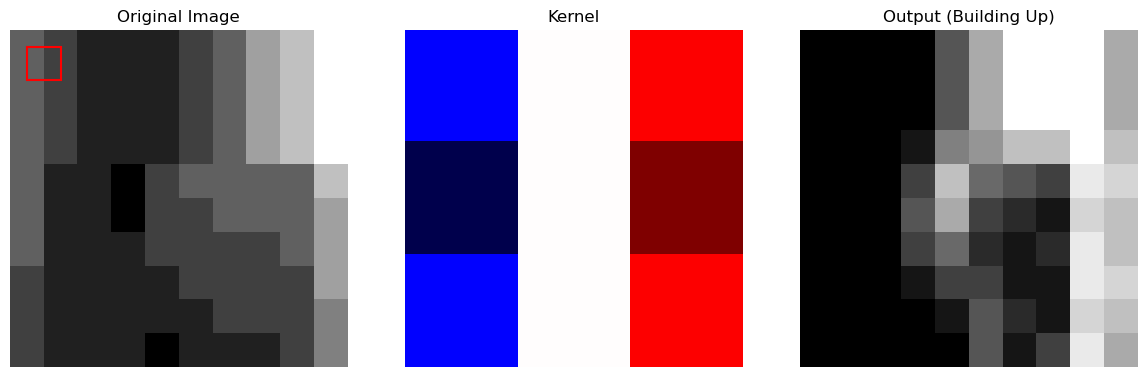

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Extract a small patch from your image
small_img = img[100:110, 100:110]  # 10x10 patch (adjust as needed)

# Use a vertical Sobel edge detection kernel
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]], dtype=np.float32)

# Padding the image to preserve dimensions
kh, kw = kernel.shape
ph, pw = kh // 2, kw // 2
padded_img = cv2.copyMakeBorder(small_img, ph, ph, pw, pw, borderType=cv2.BORDER_REPLICATE)

# Output image
output_img = np.zeros_like(small_img, dtype=np.float32)

# Set up the figure and axes
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
plt.tight_layout()

def update(frame):
    for ax in axs:
        ax.clear()

    h, w = small_img.shape
    y, x = divmod(frame, w)

    region = padded_img[y:y+kh, x:x+kw]
    conv_value = np.sum(region * kernel)
    output_img[y, x] = np.clip(conv_value, 0, 255)

    axs[0].imshow(small_img, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].add_patch(plt.Rectangle((x, y), 1, 1, edgecolor='red', facecolor='none', linewidth=1.5))
    axs[0].axis('off')

    axs[1].imshow(kernel, cmap='seismic', interpolation='nearest')
    axs[1].set_title('Kernel')
    axs[1].axis('off')

    axs[2].imshow(output_img, cmap='gray')
    axs[2].set_title('Output (Building Up)')
    axs[2].axis('off')

    return axs

# Create animation
num_frames = small_img.shape[0] * small_img.shape[1]
ani = FuncAnimation(fig, update, frames=num_frames, interval=100, blit=False)

# Display the animation inline
HTML(ani.to_jshtml())


# Non - linear filters

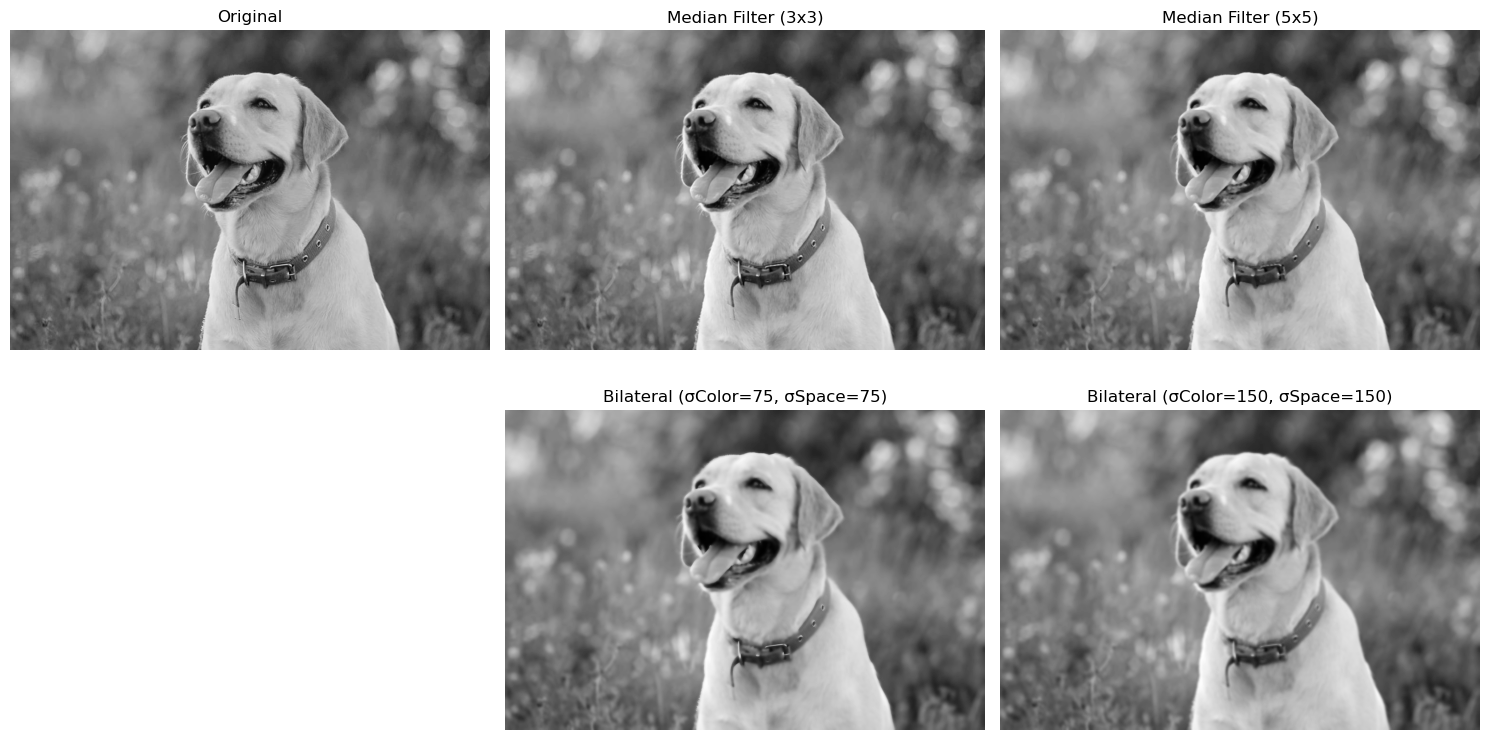

In [15]:
import cv2
import matplotlib.pyplot as plt

# Apply Median Filters
median_3 = cv2.medianBlur(img, 3)
median_5 = cv2.medianBlur(img, 5)

# Apply Bilateral Filters
bilateral_1 = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)
bilateral_2 = cv2.bilateralFilter(img, d=9, sigmaColor=150, sigmaSpace=150)

# Plot
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(median_3, cmap='gray')
plt.title('Median Filter (3x3)')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(median_5, cmap='gray')
plt.title('Median Filter (5x5)')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(bilateral_1, cmap='gray')
plt.title('Bilateral (σColor=75, σSpace=75)')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(bilateral_2, cmap='gray')
plt.title('Bilateral (σColor=150, σSpace=150)')
plt.axis('off')

plt.tight_layout()
plt.show()


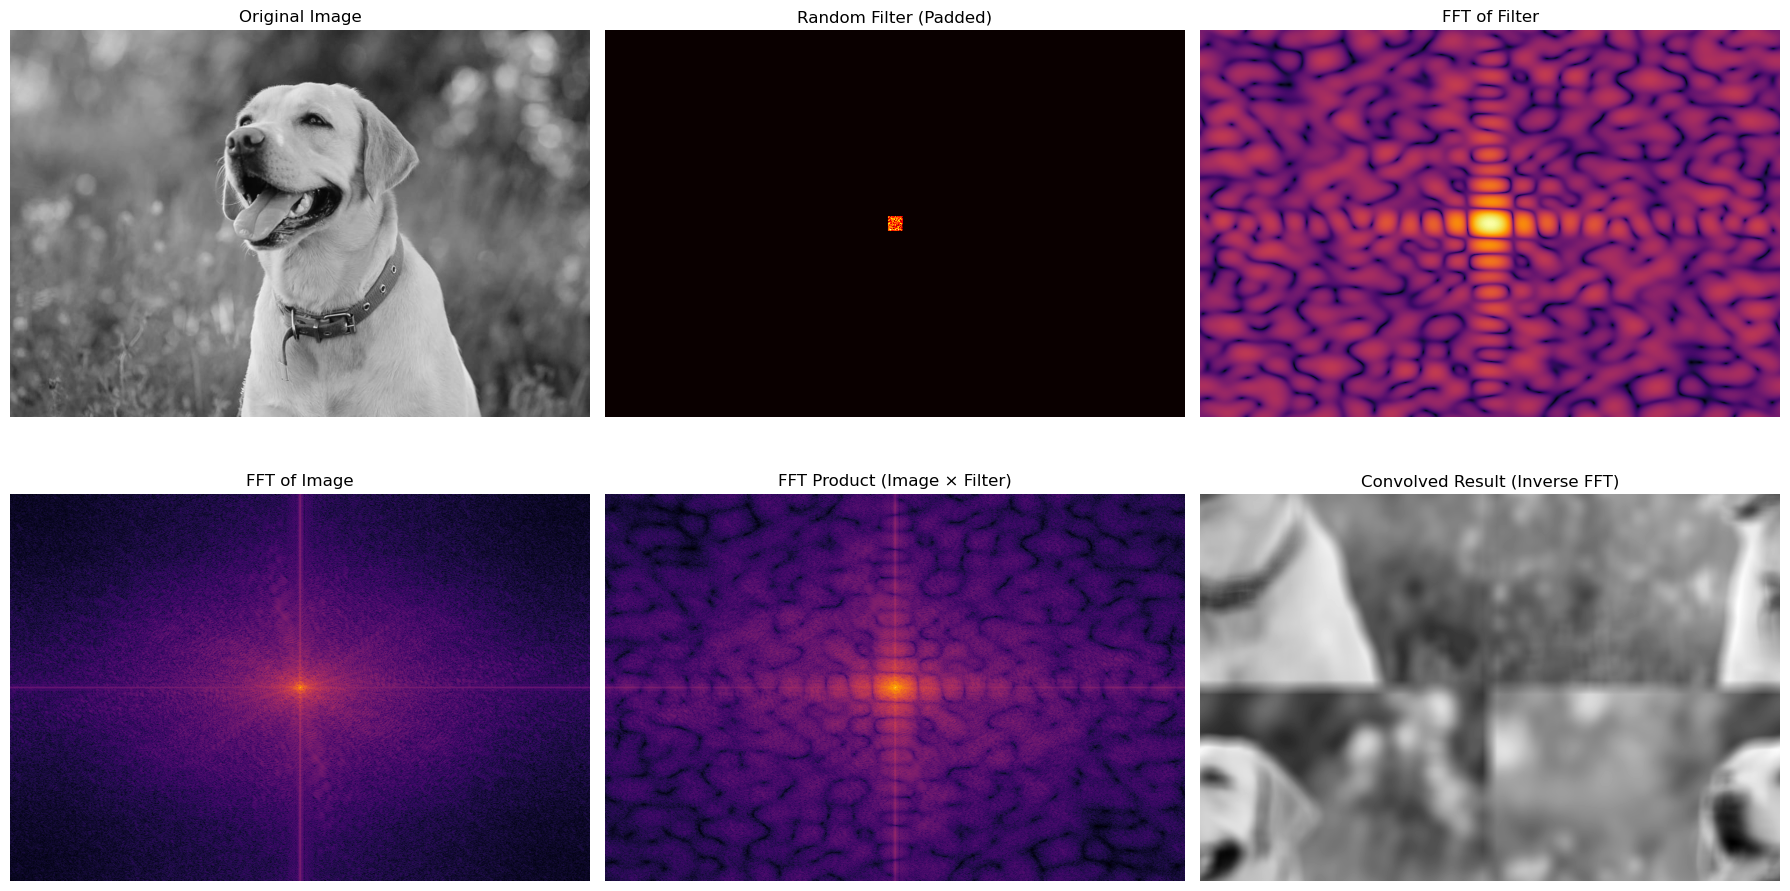

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Ensure image is grayscale and normalized
gray = img if len(img.shape) == 2 else cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray) / 255.0  # normalize to [0, 1]

# Step 1: Create a random filter
filter_size = 25  # Try 25x25 random filter
random_filter = np.random.rand(filter_size, filter_size)

# Step 2: Pad the filter to match image size (centered)
h, w = gray.shape
fh, fw = random_filter.shape
padded_filter = np.zeros_like(gray)

# Compute correct start and end positions (centered placement)
y_start = h // 2 - fh // 2
y_end   = y_start + fh
x_start = w // 2 - fw // 2
x_end   = x_start + fw

# Paste filter into padded array
padded_filter[y_start:y_end, x_start:x_end] = random_filter

# Step 3: FFTs
F_img = np.fft.fft2(gray)
F_filter = np.fft.fft2(padded_filter)

# Step 4: Multiply in frequency domain
F_product = F_img * F_filter

# Step 5: Inverse FFT to get convolved result
convolved = np.fft.ifft2(F_product)
convolved = np.abs(convolved)  # Take magnitude

# Normalize output for display
convolved_norm = (convolved - np.min(convolved)) / (np.max(convolved) - np.min(convolved))

# Step 6: FFT Shift for visualization
F_img_shifted = np.fft.fftshift(F_img)
F_filter_shifted = np.fft.fftshift(F_filter)
F_product_shifted = np.fft.fftshift(F_product)

# Step 7: Display all results
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(padded_filter, cmap='hot')
plt.title('Random Filter (Padded)')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(np.log1p(np.abs(F_filter_shifted)), cmap='inferno')
plt.title('FFT of Filter')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(np.log1p(np.abs(F_img_shifted)), cmap='inferno')
plt.title('FFT of Image')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(np.log1p(np.abs(F_product_shifted)), cmap='inferno')
plt.title('FFT Product (Image × Filter)')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(convolved_norm, cmap='gray')
plt.title('Convolved Result (Inverse FFT)')
plt.axis('off')

plt.tight_layout()
plt.show()
